# Introduction

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from curvey import Curve, Curves

In [37]:
plt.rcParams["figure.figsize"] = (3, 3)
plt.rcParams["axes.titlesize"] = 10
plt.rcParams["axes.labelsize"] = 8
plt.rcParams["xtick.labelsize"] = 8
plt.rcParams["ytick.labelsize"] = 8

## Basics

A `Curve` is defined and constructed its vertex coordinates:

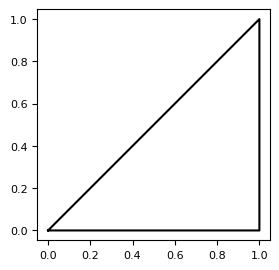

In [38]:
triangle = Curve([[0, 0], [1, 0], [1, 1]])
_ = triangle.plot()

Note: all of the `curvey` plotting routines return matplotlib handles to the plotted object; they're assigned throughout these tutorials to the discarded variable `_` to avoid clutter.

The vertex coordinates can be accessed by the `points` property (they've been converted to a numpy array automatically.)

In [3]:
triangle.points

array([[0, 0],
       [1, 0],
       [1, 1]])

Note: the curve is only implicitly closed; there is an assumed edge between the last point and the first. 

A `Curve` with `n` vertices has `n` edges. 

Edges are directed, giving the curve an *orientation*. We can visualize the orientation with `Curve.plot_edges`, which draws each edge as a little arrow. By default, edges are colored by their cumulative length:

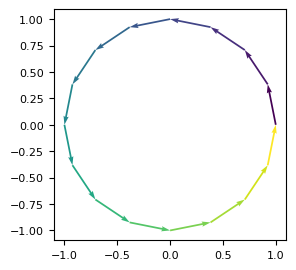

In [43]:
circle = Curve.circle(n=16, r=1)
_ = circle.plot_edges()

The curve starts at $(x=1, y=0)$ and travels counterclockwise. Curve constructors like `Curve.circle` construct the curve in counterclockwise orientation. `Curve.orientation` is `+1` for counterclockwise curves, and `-1` for clockwise. This has the same sign conventions as `Curve.signed_area`.

In [8]:
circle.orientation, circle.signed_area

(1, 3.061467458920718)

`Curve.reverse()` flips the orientation; `Curve.to_ccw()` and `Curve.to_cw()` do so as appropriate.

In [9]:
elcric = circle.reverse()
elcric.orientation, elcric.signed_area

(-1, -3.0614674589207183)

Geometric properties of the curve are mostly represented as curve properties, which may be scalar, vertex-valued, or edge-valued. They are computed on-demand on their first access, and cached for later reuse.

In [10]:
circle.length # A scalar

6.242890304516104

In [30]:
circle.centroid  # A two element array

array([6.04406786e-18, 0.00000000e+00])

In [31]:
circle.edge_length  # A length-`n` vector of edge lengths

array([0.39018064, 0.39018064, 0.39018064, 0.39018064, 0.39018064,
       0.39018064, 0.39018064, 0.39018064, 0.39018064, 0.39018064,
       0.39018064, 0.39018064, 0.39018064, 0.39018064, 0.39018064,
       0.39018064])

In [32]:
circle.tangent  # A (`n`, 2) array of tangent directions

array([[ 0.00000000e+00,  1.00000000e+00],
       [-3.82683432e-01,  9.23879533e-01],
       [-7.07106781e-01,  7.07106781e-01],
       [-9.23879533e-01,  3.82683432e-01],
       [-1.00000000e+00,  0.00000000e+00],
       [-9.23879533e-01, -3.82683432e-01],
       [-7.07106781e-01, -7.07106781e-01],
       [-3.82683432e-01, -9.23879533e-01],
       [-2.26394716e-16, -1.00000000e+00],
       [ 3.82683432e-01, -9.23879533e-01],
       [ 7.07106781e-01, -7.07106781e-01],
       [ 9.23879533e-01, -3.82683432e-01],
       [ 1.00000000e+00, -2.26394716e-16],
       [ 9.23879533e-01,  3.82683432e-01],
       [ 7.07106781e-01,  7.07106781e-01],
       [ 3.82683432e-01,  9.23879533e-01]])

Curve transformations like `Curve.scale` are methods that return a new curve:

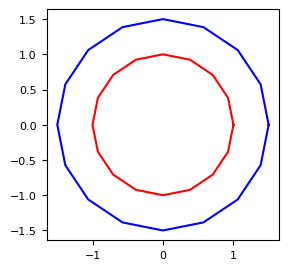

In [44]:
bigger_circle = circle.scale(1.5)
circle.plot(color='red')
bigger_circle.plot(color='blue');

## Plotting

In addition to `Curve.plot` and `Curve.plot_edges`, already demonstrated, there is also `Curve.plot_points` and `Curve.plot_vectors`.

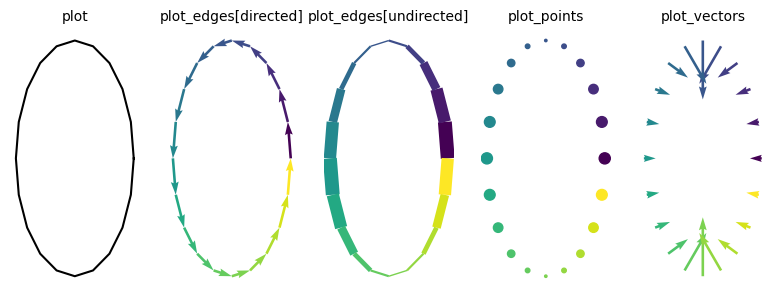

In [45]:
c = Curve.ellipse(n=20, ra=1, rb=2)
fig, axs = plt.subplots(1, 5, figsize=(8, 3), sharex=True, sharey=True)
   
_ = c.plot(ax=axs[0], color='black')
_ = c.plot_edges(
    ax=axs[1], 
    directed=True, 
    color=c.arclength, 
    width=0.02,
)
_ = c.plot_edges(
    ax=axs[2], 
    directed=False, 
    color=c.arclength, 
    width=1 / np.abs(c.curvature), 
    scale_width=(1, 10),
)
_ = c.plot_points(
    ax=axs[3], 
    color=c.arclength, 
    size=c.dual_edge_length, 
    scale_sz=(3, 64),
)
_ = c.plot_vectors(
    ax=axs[4], 
    vectors=c.normal, 
    scale=c.curvature, 
    scale_length=(0.2, 1), 
    color=c.arclength, 
    width=0.02,
)
titles = (
    'plot', 
    'plot_edges[directed]', 
    'plot_edges[undirected]', 
    'plot_points', 
    'plot_vectors',
)
for ax, ttl in zip(axs, titles):
    ax.set_title(ttl, fontsize='10')
    ax.axis('off')
    ax.axis('scaled')

fig.tight_layout()

## Metadata

`Curve.with_data` can be used to attach or overwrite arbitrary metadata to a curve, which persists through transformations.

In [51]:
c0 = Curve.star(n=6, r0=1, r1=1.5)
c1 = c0.with_data(name='mystar', max_radius=1.5)
c2 = c1.scale(2).with_data(max_radius=3)
for c in (c0, c1, c2):
    print(c)

Curve(n=12)
Curve(n=12, name=mystar, max_radius=1.5)
Curve(n=12, name=mystar, max_radius=3)


Metadata can be accessed by indexing by the property name:

In [52]:
c1['max_radius']

1.5

Or as a read-only `dict` via the `Curve.data` property:

In [15]:
c0.data

mappingproxy({'name': 'mystar', 'max_radius': 1.5})

## Curves

The `Curves` class is used for storing multiple curves. The constructor accepts an iterator of `Curve`s.

In [16]:
n = 5
curves = Curves(
    Curve.circle(20, r=r).with_data(radius=r, shape='circle') 
    for r in np.linspace(1, 2, n)
)
curves

Curves(n=5, data={idx, radius, shape})

`Curves.subplots` constructs subplots for quick inspection:

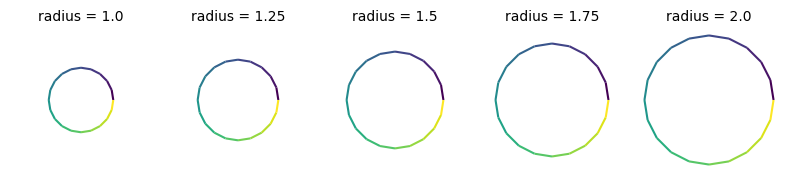

In [46]:
_ = curves.subplots(subtitle='radius', figsize=(8, 3))

`Curves.superimposed` does the same thing in a single axis:

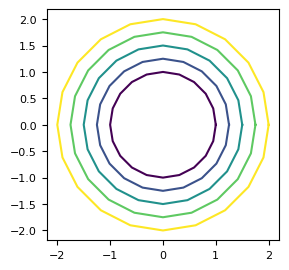

In [47]:
_ = curves.superimposed(color='radius')  # Color by the metadata property 'radius'

`Curves` can be iterated over:

In [39]:
for c in curves:
    print(c)

Curve(n=20, radius=1.0, shape=circle, idx=0)
Curve(n=20, radius=1.25, shape=circle, idx=1)
Curve(n=20, radius=1.5, shape=circle, idx=2)
Curve(n=20, radius=1.75, shape=circle, idx=3)
Curve(n=20, radius=2.0, shape=circle, idx=4)


and can be indexed like lists or numpy arrays, e.g. `curves[1]` returns the second dict and `curves[::2]` returns a new `Curves` containing every second curve in the original. Curve metadata can be collected by indexing with the property name:`

In [48]:
curves['radius']

array([1.  , 1.25, 1.5 , 1.75, 2.  ])

or a function:

In [49]:
curves[lambda c: 2 * c.length]

array([12.5147572 , 15.6434465 , 18.7721358 , 21.90082511, 25.02951441])

or more generally with `Curves.get_data` in order to supply default values if not all curves have the requested metadata.